In [19]:
import matplotlib.pyplot as plt
import tensorflow as tf
import visualkeras
from keras import layers, models
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.datasets import cifar10
from keras.models import load_model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

In [8]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)
train_generator = train_datagen.flow(x_train, y_train, batch_size=64)

In [9]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(64, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(128, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(256, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(256, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Conv2D(512, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(512, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(512),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [10]:
optimizer = Adam(lr=0.0001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

checkpoint = ModelCheckpoint("cnn_model.keras", monitor="val_accuracy", save_best_only=True, verbose=1)

# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(train_generator, epochs=100, validation_data=(x_test, y_test), callbacks=[reduce_lr, checkpoint])

Epoch 1/100



782/782 [==============================] - ETA: 0s - loss: 1.6034 - accuracy: 0.4287
Epoch 1: val_accuracy improved from -inf to 0.36610, saving model to cnn_model.keras
782/782 [==============================] - 175s 219ms/step - loss: 1.6034 - accuracy: 0.4287 - val_loss: 2.5632 - val_accuracy: 0.3661 - lr: 0.0010
Epoch 2/100
782/782 [==============================] - ETA: 0s - loss: 1.0655 - accuracy: 0.6232
Epoch 2: val_accuracy improved from 0.36610 to 0.66410, saving model to cnn_model.keras
782/782 [==============================] - 161s 206ms/step - loss: 1.0655 - accuracy: 0.6232 - val_loss: 0.9615 - val_accuracy: 0.6641 - lr: 0.0010
Epoch 3/100
782/782 [==============================] - ETA: 0s - loss: 0.8887 - accuracy: 0.6918
Epoch 3: val_accuracy did not improve from 0.66410
782/782 [==============================] - 158s 202ms/step - loss: 0.8887 - accuracy: 0.6918 - val_loss: 1.1059 - val_accuracy: 0.6454 - lr: 0.0010
Epoch 4/100
782/782 [==============================] 

In [20]:
def plot_results(history):
    history_dict = history.history

    epochs = range(1, len(history_dict["accuracy"]) + 1)

    plt.plot(epochs, history_dict["loss"], "bo", label="Training loss")
    plt.plot(epochs, history_dict["val_loss"], "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    plt.plot(epochs, history_dict["accuracy"], "bo", label="Training acc"),
    plt.plot(epochs, history_dict["val_accuracy"], "b", label="Validation acc")
    plt.title("Training and validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Precision")
    plt.legend()
    plt.show()

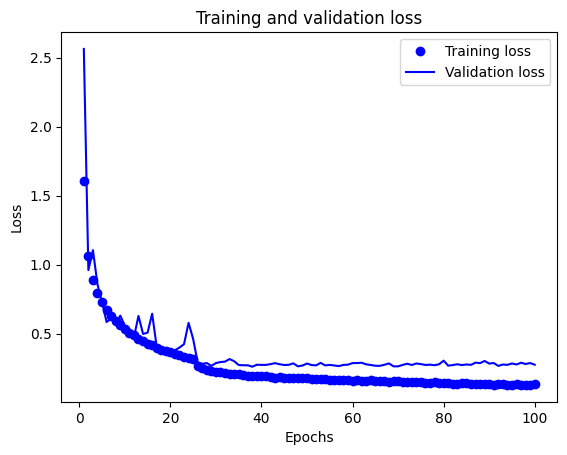

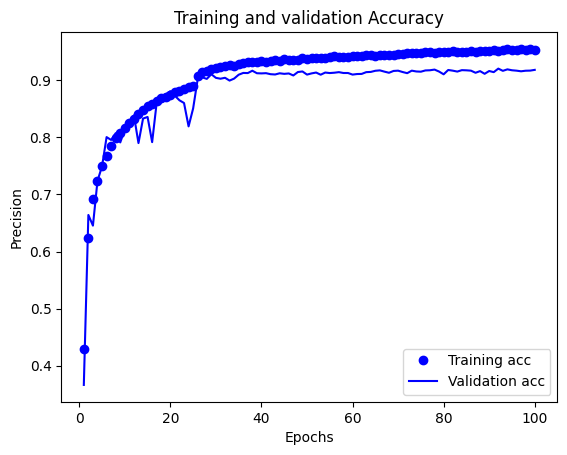

In [21]:
plot_results(history)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_9 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 activation_9 (Activation)   (None, 32, 32, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_10 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_10 (Activation)  (None, 32, 32, 64)       

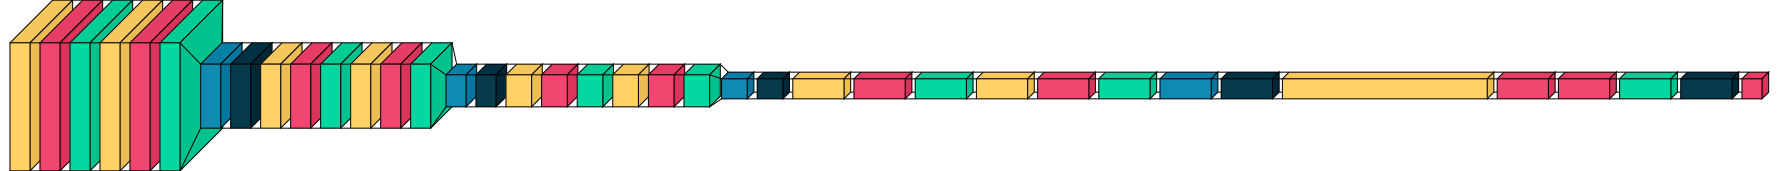

In [44]:
model.summary()
visualkeras.layered_view(model)

In [11]:
model = load_model('cnn_model.keras')

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

313/313 - 10s - loss: 0.2672 - accuracy: 0.9207 - 10s/epoch - 31ms/step

Test accuracy: 0.9207


In [22]:
class_names = [
    "Airplane",
    "Automobile",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck",
]

In [28]:
from keras.preprocessing.image import img_to_array, load_img
import numpy as np

In [41]:
def predict_img(path_to_img):
    img = load_img(path_to_img, target_size=(32, 32))
    print(plt.imshow(img))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    return predicted_class

AxesImage(shape=(32, 32, 3))
1/1 [==============================] - 0s 24ms/step


'Airplane'

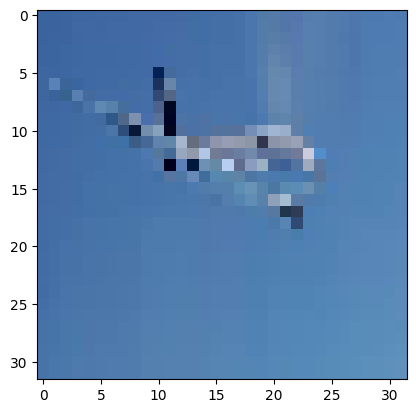

In [42]:
predict_img("plane.jpg")